## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## 시각화를 위한 한글 폰트 설정하기

- 한글 font 이름(family) 확인 : https://thankee.tistory.com/100

In [2]:
# 한글폰트 설정
import matplotlib.pyplot as plt

#굴림, 맑은 고딕체는 한글 지원됨 나머지는 확인바람(거의 안됨)
plt.rc("font", family="Gulim") #굴림
#plt.rc("font", family="Malgun Gothic") #맑은 고딕
plt.rc("axes", unicode_minus=False)

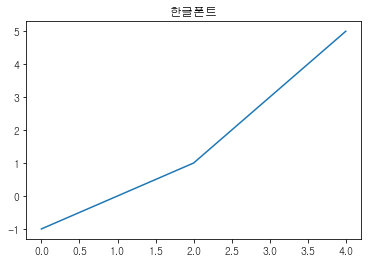

In [3]:
# 한글폰트와 마이너스 폰트 설정 확인

pd.Series([-1, 0, 1, 3, 5]).plot(title="한글폰트")

## 데이터 불러오기
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do

In [4]:
# 파일을 불러와 df 라는 변수에 담습니다.
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df = pd.read_csv("data/상가업소정보_201912_02.csv", encoding='utf-8', sep='|', low_memory=False)

In [5]:
df.columns[34]

'동정보'

### 데이터 미리보기

In [6]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19917773,대구통닭,통통치킨상인2호점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2729011500115310012015585,NaN,대구광역시 달서구 상화북로43길 74,704370.0,42806.0,NaN,1,NaN,128.54604,35.817554


### info 보기

In [7]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528311 entries, 0 to 528310
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     528311 non-null  int64  
 1   상호명        528311 non-null  object 
 2   지점명        63168 non-null   object 
 3   상권업종대분류코드  528311 non-null  object 
 4   상권업종대분류명   528311 non-null  object 
 5   상권업종중분류코드  528311 non-null  object 
 6   상권업종중분류명   528311 non-null  object 
 7   상권업종소분류코드  528311 non-null  object 
 8   상권업종소분류명   528311 non-null  object 
 9   표준산업분류코드   496133 non-null  object 
 10  표준산업분류명    496133 non-null  object 
 11  시도코드       528311 non-null  int64  
 12  시도명        528311 non-null  object 
 13  시군구코드      528311 non-null  int64  
 14  시군구명       528311 non-null  object 
 15  행정동코드      528311 non-null  int64  
 16  행정동명       528311 non-null  object 
 17  법정동코드      528311 non-null  int64  
 18  법정동명       528311 non-null  object 
 19  지번코드       528311 non-n

### 결측치 보기

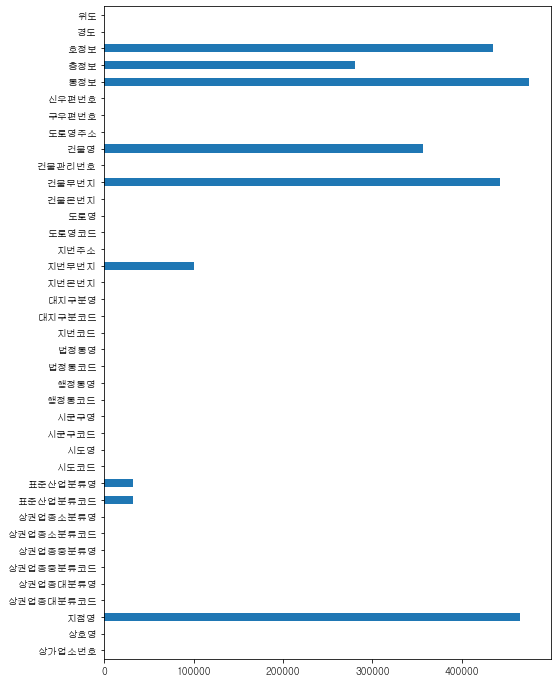

In [8]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
df.isnull().sum().plot.barh(figsize=(8, 12))

### 사용하지 않는 컬럼 제거하기

In [9]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']

df = df[columns].copy()
df.shape

(528311, 11)

In [10]:
# 제거 후 메모리 사용량 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528311 entries, 0 to 528310
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       528311 non-null  object 
 1   상권업종대분류명  528311 non-null  object 
 2   상권업종중분류명  528311 non-null  object 
 3   상권업종소분류명  528311 non-null  object 
 4   시도명       528311 non-null  object 
 5   시군구명      528311 non-null  object 
 6   행정동명      528311 non-null  object 
 7   법정동명      528311 non-null  object 
 8   도로명주소     528311 non-null  object 
 9   경도        528311 non-null  float64
 10  위도        528311 non-null  float64
dtypes: float64(2), object(9)
memory usage: 44.3+ MB


## 색인으로 서브셋 가져오기

### 대구만 따로 보기

In [11]:
# 시도명이 대구 시작하는 데이터만 봅니다.
# 또, df_daegu 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.
df_daegu = df[df["시도명"] == "대구광역시"].copy()
df_daegu.shape

(129875, 11)

### 일부 텍스트가 들어가는 데이터만 가져오기
* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 스타벅스의 영문명은 STARBUCKS, 이디야는 EDIYA 입니다.

* https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

In [12]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.
df_daegu["상호명_소문자"] = df_daegu["상호명"].str.lower()

In [53]:
# ediya 를 "상호명_소문자" 컬럼으로 가져옵니다.
# '상호명_소문자'컬럼으로 '이디야|ediya' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]

df_daegu.loc[df_daegu["상호명_소문자"].str.contains("이디야|이디아|ediya"), "상호명_소문자"]

16270       이디아커피시지점
67297          이디야커피
70134          이디야커피
75944           코이디아
85299          이디야커피
110825         이디야커피
128237         이디야커피
136776          코이디아
164361        이디야이마트
307802         이디야커피
310411         이디아까페
315086         이디야커피
315155         이디야커피
325123         이디야커피
337221         이디야커피
339601         이디야커피
343355         이디야커피
373954         이디야커피
376872         이디야커피
381899    이디야커피대구종로점
383090         이디야커피
391974     이디야커피대명동점
400241    이디야커피대구봉덕점
401564         이디야커피
403762         이디야커피
405304         이디야커피
406076         이디야커피
408164         이디야커피
408701         이디야커피
411412         이디야커피
412400         이디야커피
412855         이디야커피
428415    이디야커피대구송현점
438357         이디야커피
439890         이디야커피
442241         이디야커피
489054         이디야커피
494386         이디야커피
512351         이디야커피
Name: 상호명_소문자, dtype: object

In [14]:
df_daegu.loc[df_daegu["상호명_소문자"].str.contains("이디야|이디아|ediya"), "상호명_소문자"].shape

(39,)

In [52]:
# 상호명에서 스타벅스만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 스타벅스|starbucks 의 "상호명_소문자"로 갯수를 세어봅니다.

df_daegu.loc[df_daegu["상호명_소문자"].str.contains("스타벅스|starbucks"), "상호명_소문자"]

30554     스타벅스동성로중앙점
31198      스타벅스대구법원점
31464           스타벅스
41627           스타벅스
53418           스타벅스
             ...    
488632          스타벅스
493976          스타벅스
495284          스타벅스
495807          스타벅스
517180          스타벅스
Name: 상호명_소문자, Length: 77, dtype: object

In [16]:
df_daegu.loc[df_daegu["상호명_소문자"].str.contains("스타벅스|starbucks"), "상호명_소문자"].shape

(77,)

In [17]:
# '상호명_소문자'컬럼으로  '스타벅스|starbucks|이디야|이디아|ediya'를 가져와 df_cafe 변수에 담습니다.
df_cafe = df_daegu[df_daegu["상호명_소문자"].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_cafe.shape

(116, 12)

In [18]:
# ~은 not을 의미합니다. 스타벅스가 아닌 데이터는 이디야로 넣어주어도 되지만
# 아래 코드처럼 결측치를 이디야로 채워줘도 괜찮습니다.
# df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks'), '브랜드명'] = '이디야'

df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "스타벅스"
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "이디야"
df_cafe[["상호명_소문자", "브랜드명"]].head()

,상호명_소문자,브랜드명
16270,이디아커피시지점,이디야
30554,스타벅스동성로중앙점,스타벅스
31198,스타벅스대구법원점,스타벅스
31464,스타벅스,스타벅스
41627,스타벅스,스타벅스


In [19]:
# df_cafe에 담긴 상호명','브랜드명'으로 미리보기를 합니다.

df_cafe[["상호명", "브랜드명"]].tail()

,상호명,브랜드명
494386,이디야커피,이디야
495284,스타벅스,스타벅스
495807,스타벅스,스타벅스
512351,이디야커피,이디야
517180,스타벅스,스타벅스


### 시각화
#### 분류별 countplot 그리기

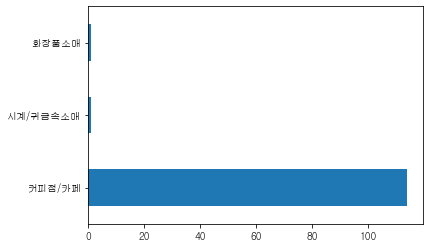

In [20]:
# "상권업중분류명"을 countplot 으로 시각화하고 분류 혹은 데이터가 잘못 색인된 데이터가 있는지 봅니다.
df_cafe["상권업종중분류명"].value_counts().plot.barh()

In [21]:
print(df_cafe.shape)
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "커피점/카페"].copy()
df_cafe.shape

(116, 13)


(114, 13)

In [22]:
# 브랜드명으로 각 카페의 갯수를 세어봅니다.

df_cafe["브랜드명"].value_counts()

스타벅스    77
이디야     37
Name: 브랜드명, dtype: int64

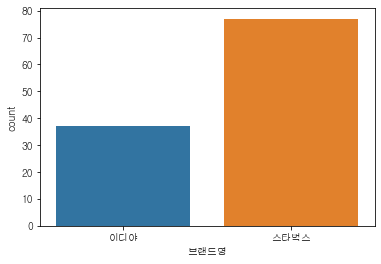

In [23]:
# 브랜드명을 막대그래프로 그려봅니다.

sns.countplot(data=df_cafe, x="브랜드명")

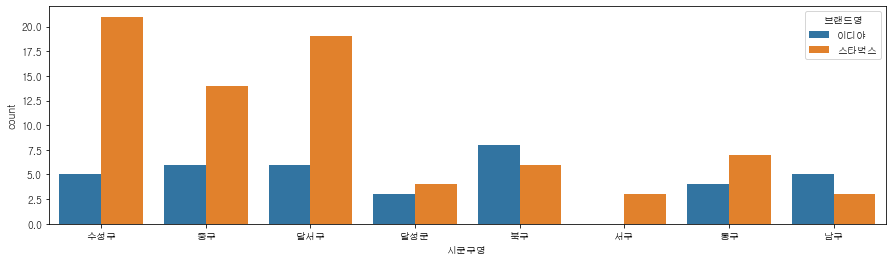

In [24]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

#### scatterplot 그리기
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

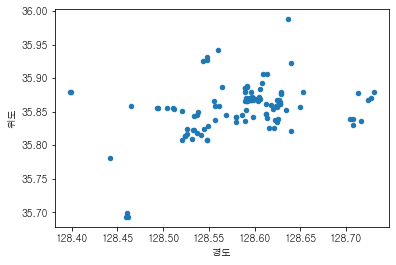

In [25]:
# pandas로 scatterplot을 그려봅니다.

df_cafe[["위도", "경도"]].plot.scatter(x="경도", y="위도")

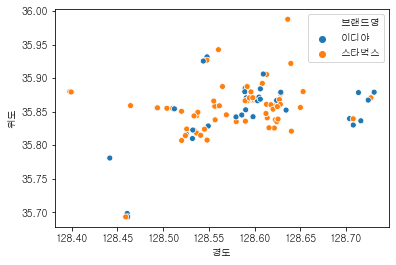

In [26]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

#### jointplot 그리기

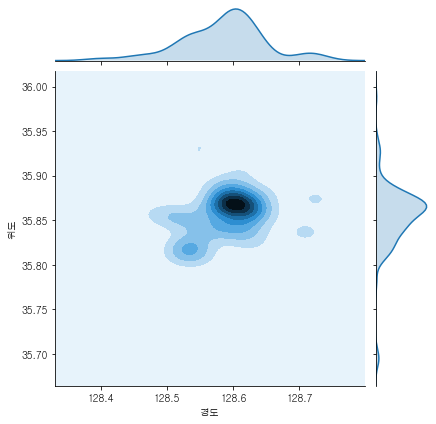

In [27]:
# jointplot 그리기
sns.jointplot(data=df_cafe, x="경도", y="위도", kind="kde" )

## 구별 브랜드별 점포수
### groupby 와 pivot_table 로 구별 스타벅스, 이디야 매장 수 구하기
#### groupby 로 구별 매장수 구하기

In [28]:
# 구별로 브랜드별 점포수를 구합니다.
# groupby 를 사용하면 구별로 그룹화 해서 점포수를 구할 수 있습니다.
# 그룹화한 결과를 df_cafe_vs 변수에 담아서 재사용합니다.

df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
df_cafe_vs.head()

시군구명  브랜드명
남구    스타벅스     3
      이디야      5
달서구   스타벅스    19
      이디야      6
달성군   스타벅스     4
Name: 상호명, dtype: int64

In [29]:
df_cafe_vs.to_frame().head()

상호명
시군구명 브랜드명     
남구   스타벅스    3
     이디야     5
달서구  스타벅스   19
     이디야     6
달성군  스타벅스    4

In [30]:
# reset_index 로 인덱스를 컬럼으로 만듭니다.
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,남구,스타벅스,3
1,남구,이디야,5
2,달서구,스타벅스,19
3,달서구,이디야,6
4,달성군,스타벅스,4


In [31]:
# groupby '시군구명', '브랜드명' 으로 갯수를 세어봅니다.
# 결과에 대한 데이터프레임 컬럼명을 ['구', '브랜드명', '매장수'] 로 지정합니다.

df_cafe_vs.columns = ['구', '브랜드명', '매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,남구,스타벅스,3
1,남구,이디야,5
2,달서구,스타벅스,19
3,달서구,이디야,6
4,달성군,스타벅스,4


#### pivot_table 로 구별 매장수 구하기

In [32]:
# 위에서 했던 과정을 pivot_table 로 구합니다.

pivot = pd.pivot_table(data=df_cafe, 
               index=["시군구명", "브랜드명"], 
               values="상호명", aggfunc="count")
pivot.head()

상호명
시군구명 브랜드명     
남구   스타벅스    3
     이디야     5
달서구  스타벅스   19
     이디야     6
달성군  스타벅스    4

In [33]:
# 특정 구 데이터만 가져와서 보기
pivot.loc["달서구"]

,상호명
브랜드명,
스타벅스,19
이디야,6


### 막대그래프로 시각화 하기

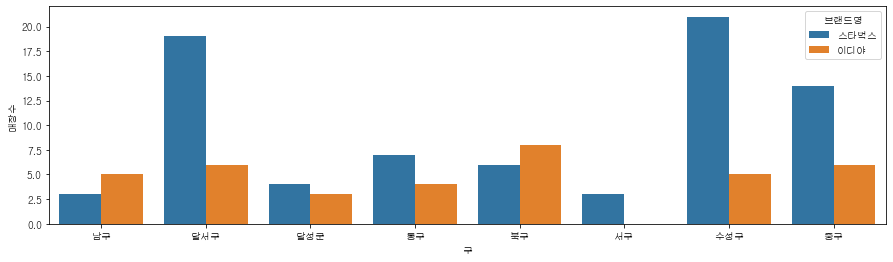

In [34]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs, x="구", y="매장수", hue="브랜드명")

## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [38]:
# 지도 시각화를 위한 라이브러리
import folium

In [39]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 

lat = df_cafe["위도"].mean()
long = df_cafe["경도"].mean()
lat, long

(35.85493152535467, 128.58509692608465)

### 스타벅스 이디야 카페 매장 전체 분포
* 스타벅스와 이디야 매장을 Marker와 CircleMarker로 지도에 표현합니다.

In [41]:
m = folium.Map([lat, long], zoom_start=12) #, tiles="Stamen Toner")

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    
    title = f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}"
    
    color = "green"
    if df_cafe.loc[i, "브랜드명"] == "이디야":
        color = "blue"
    
    folium.CircleMarker([sub_lat, sub_long],
                        radius=3,
                        color=color,
                          tooltip=title).add_to(m)
m

In [42]:
#지도가 한글 깨짐 : 임시적인 해결방법
m.save('starbuck_ediya.html')

### 스타벅스 매장 분포

In [43]:
# df_cafe_vs 변수에 담긴 값을 통해 스타벅스의 매장 수를 구합니다.
# "브랜드명"컬럼으로 스타벅스만 가져옵니다.

df_star = df_cafe_vs[df_cafe_vs["브랜드명"] == "스타벅스"].copy()
df_star.head()

,구,브랜드명,매장수
0,남구,스타벅스,3
2,달서구,스타벅스,19
4,달성군,스타벅스,4
6,동구,스타벅스,7
8,북구,스타벅스,6


### 이디야 매장 분포

In [44]:
# 이디야의 매장 수를 구합니다.
# "브랜드명"컬럼으로 이디야만 가져옵니다.
df_ediya = df_cafe_vs[df_cafe_vs["브랜드명"] == "이디야"].copy()
df_ediya.head()

,구,브랜드명,매장수
1,남구,이디야,5
3,달서구,이디야,6
5,달성군,이디야,3
7,동구,이디야,4
9,북구,이디야,8


In [45]:
# df_vs 라는 변수에 구별 브랜드명을 pivot해서 스타벅스와 이디야 매장을 비교할 수 있는 형태로 만듭니다.
# 그리고 ["스타벅스", "이디야"] 로 컬럼명을 변경해주고 
# 스타벅스와 이디야의 매장을 비교한 값을 "매장수비교" 컬럼에 담아줍니다.
df_vs = df_cafe_vs.pivot(index="구", columns="브랜드명", values="매장수")
df_vs["매장수비교"] = df_vs["스타벅스"] - df_vs["이디야"] > 0
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구,,,
남구,3.0,5.0,False
달서구,19.0,6.0,True
달성군,4.0,3.0,True
동구,7.0,4.0,True
북구,6.0,8.0,False


In [46]:
# 간단한 함수를 사용해서 스타벅스가 이디야보다 매장수가 많을 때 1을 출력하도록 합니다.
df_vs["매장수비교"] = df_vs["매장수비교"].astype(float)
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구,,,
남구,3.0,5.0,0.0
달서구,19.0,6.0,1.0
달성군,4.0,3.0,1.0
동구,7.0,4.0,1.0
북구,6.0,8.0,0.0


In [47]:
# 구를 컬럼명으로 사용하기 위해 reset_index 를 합니다.
# 데이터 프레임을 df_vs 에 저장합니다.
df_vs = df_vs.reset_index()
df_vs.head()

브랜드명,구,스타벅스,이디야,매장수비교
0,남구,3.0,5.0,0.0
1,달서구,19.0,6.0,1.0
2,달성군,4.0,3.0,1.0
3,동구,7.0,4.0,1.0
4,북구,6.0,8.0,0.0


In [48]:
df_gu_mean = df_cafe.pivot_table(index="시군구명", values=["경도", "위도"], aggfunc="mean")
df_gu_mean = df_gu_mean.reset_index()
df_gu_mean.head()

,시군구명,경도,위도
0,남구,128.584182,35.842793
1,달서구,128.529908,35.831796
2,달성군,128.440534,35.783484
3,동구,128.667273,35.889781
4,북구,128.584822,35.901471


In [49]:
df_vs = df_vs.merge(df_gu_mean, how='inner', left_on="구", right_on="시군구명")
df_vs.head()

,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,남구,3.0,5.0,0.0,남구,128.584182,35.842793
1,달서구,19.0,6.0,1.0,달서구,128.529908,35.831796
2,달성군,4.0,3.0,1.0,달성군,128.440534,35.783484
3,동구,7.0,4.0,1.0,동구,128.667273,35.889781
4,북구,6.0,8.0,0.0,북구,128.584822,35.901471


##  카페간의 거리 측정

In [222]:
df_cafe_star = df_daegu[df_daegu["상호명_소문자"].str.contains('스타벅스|starbucks')].copy()
print("STARBUCKS:",df_cafe_star.shape[0], "=> ", end="")
df_cafe_star = df_cafe_star[df_cafe_star["상권업종중분류명"] == "커피점/카페"]
print(df_cafe_star.shape[0])

df_cafe_edi = df_daegu[df_daegu["상호명_소문자"].str.contains('이디야|이디아|ediya')].copy()
print("EDIYA:", df_cafe_edi.shape[0], "=> ", end="")
df_cafe_edi = df_cafe_edi[df_cafe_edi["상권업종중분류명"] == "커피점/카페"]
print(df_cafe_edi.shape[0])

STARBUCKS: 77 => 77
EDIYA: 39 => 37


In [223]:
df_cafe_star.shape

(77, 12)

In [224]:
#중복 제거
print("STARBUCKS:",df_cafe_star.shape[0], "=> ", end="")
df_cafe_star = df_cafe_star.drop_duplicates(['경도','위도'], keep='last')
print(df_cafe_star.shape[0])

STARBUCKS: 77 => 75


In [225]:
df_cafe_edi.shape

(37, 12)

In [226]:
#중복 제거
print("EDIYA:", df_cafe_edi.shape[0], "=> ", end="")
df_cafe_edi = df_cafe_edi.drop_duplicates(['경도','위도'], keep='last')
print(df_cafe_edi.shape[0])

EDIYA: 37 => 35


In [227]:
df_cafe_star.columns

Index(['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명',
       '법정동명', '도로명주소', '경도', '위도', '상호명_소문자'],
      dtype='object')

In [228]:
df_cafe_star['GROUP'] = -1
df_cafe_star['브랜드명'] = '스타벅스'
df_cafe_star['MIN_DIST'] = -1.
df_cafe_star.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,GROUP,브랜드명,MIN_DIST
30554,스타벅스동성로중앙점,음식,커피점/카페,커피전문점/카페/다방,대구광역시,중구,삼덕동,삼덕동1가,대구광역시 중구 동성로5길 38,128.596677,35.867508,스타벅스동성로중앙점,-1,스타벅스,-1.0
31198,스타벅스대구법원점,음식,커피점/카페,커피전문점/카페/다방,대구광역시,수성구,범어2동,범어동,대구광역시 수성구 동대구로 376,128.627770,35.864537,스타벅스대구법원점,-1,스타벅스,-1.0
31464,스타벅스,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달서구,상인1동,상인동,대구광역시 달서구 월곡로 334,128.533791,35.822791,스타벅스,-1,스타벅스,-1.0
41627,스타벅스,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달서구,용산2동,용산동,대구광역시 달서구 달구벌대로 1393,128.520117,35.850711,스타벅스,-1,스타벅스,-1.0
53418,스타벅스,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달성군,다사읍,다사읍,대구광역시 달성군 다사읍 달구벌대로 861,128.464258,35.859160,스타벅스,-1,스타벅스,-1.0


In [229]:
df_cafe_edi['GROUP'] = -1
df_cafe_edi['브랜드명'] = '이디야'
df_cafe_edi['MIN_DIST'] = 0.
df_cafe_edi.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,GROUP,브랜드명,MIN_DIST
16270,이디아커피시지점,음식,커피점/카페,커피전문점/카페/다방,대구광역시,수성구,고산1동,신매동,대구광역시 수성구 고산로 101,128.704075,35.839788,이디아커피시지점,-1,이디야,0.0
70134,이디야커피,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달서구,신당동,신당동,대구광역시 달서구 계대동문로 7,128.493147,35.855827,이디야커피,-1,이디야,0.0
85299,이디야커피,음식,커피점/카페,커피전문점/카페/다방,대구광역시,수성구,범어4동,범어동,대구광역시 수성구 달구벌대로496길 72,128.634550,35.852487,이디야커피,-1,이디야,0.0
110825,이디야커피,음식,커피점/카페,커피전문점/카페/다방,대구광역시,동구,안심3.4동,신서동,대구광역시 동구 금강로 5,128.724505,35.867373,이디야커피,-1,이디야,0.0
128237,이디야커피,음식,커피점/카페,커피전문점/카페/다방,대구광역시,남구,대명1동,대명동,대구광역시 남구 현충로 107,128.579709,35.842705,이디야커피,-1,이디야,0.0


In [230]:
df_result = pd.DataFrame(columns=(df_cafe_edi.columns))
df_result

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,GROUP,브랜드명,MIN_DIST


## 위도 좌표 거리 구하기
pip install haversine

- 예

from haversine import haversine

kyobo = (37.504030, 127.024099) # 교보 문고 위도/경도   
gangnam = (37.497175,127.027926) # 강남역 위도 경도   

haversine(kyobo, gangnam) * 1000

In [231]:
from haversine import haversine
#kyobo = (37.504030, 127.024099) # 교보 문고 위도/경도
#gangnam = (37.497175,127.027926) # 강남역 위도 경도

result_count = 0
n =1

for i in range(df_cafe_edi.shape[0]):
    ediya = (df_cafe_edi.iloc[i,10],df_cafe_edi.iloc[i,9]) 
    min_dist = 1.
    for k in range(df_cafe_star.shape[0]):
        star = (df_cafe_star.iloc[k,10],df_cafe_star.iloc[k,9]) 
        dist = haversine(ediya, star)
        if dist < min_dist:
            min_dist = dist
            min_row = k
    if np.round(min_dist*1000) < 200 :
        print("EDIYA:",i,"STARBUCKS:", min_row, "DIST:",round(min_dist*1000))
        df_cafe_edi.iloc[i,12]=result_count
        df_cafe_star.iloc[min_row,12]=result_count
        df_cafe_star.iloc[min_row,14]= round(min_dist*1000)
        result_count+=1


EDIYA: 1 STARBUCKS: 15 DIST: 60
EDIYA: 7 STARBUCKS: 34 DIST: 36
EDIYA: 15 STARBUCKS: 45 DIST: 118
EDIYA: 22 STARBUCKS: 2 DIST: 125
EDIYA: 25 STARBUCKS: 16 DIST: 198
EDIYA: 26 STARBUCKS: 62 DIST: 193
EDIYA: 33 STARBUCKS: 64 DIST: 136


In [232]:
df_cafe_edi = df_cafe_edi[df_cafe_edi.GROUP != -1]
df_cafe_edi

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,GROUP,브랜드명,MIN_DIST
70134,이디야커피,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달서구,신당동,신당동,대구광역시 달서구 계대동문로 7,128.493147,35.855827,이디야커피,0,이디야,0.0
315086,이디야커피,음식,커피점/카페,커피전문점/카페/다방,대구광역시,북구,침산2동,침산동,대구광역시 북구 침산남로 150,128.592033,35.887801,이디야커피,1,이디야,0.0
381899,이디야커피대구종로점,음식,커피점/카페,커피전문점/카페/다방,대구광역시,중구,성내2동,남성로,대구광역시 중구 종로 17,128.592014,35.867396,이디야커피대구종로점,2,이디야,0.0
406076,이디야커피,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달서구,상인1동,상인동,대구광역시 달서구 조암남로 3,128.532407,35.822743,이디야커피,3,이디야,0.0
411412,이디야커피,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달서구,이곡1동,이곡동,대구광역시 달서구 이곡동로 55,128.512324,35.854341,이디야커피,4,이디야,0.0
412400,이디야커피,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달성군,유가면,유가면,대구광역시 달성군 유가면 테크노상업로 108,128.461151,35.693253,이디야커피,5,이디야,0.0
494386,이디야커피,음식,커피점/카페,커피전문점/카페/다방,대구광역시,동구,신암4동,신암동,대구광역시 동구 동대구로 550,128.628726,35.879098,이디야커피,6,이디야,0.0


In [233]:
df_cafe_star = df_cafe_star[df_cafe_star.GROUP != -1]
df_cafe_star

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,GROUP,브랜드명,MIN_DIST
31464,스타벅스,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달서구,상인1동,상인동,대구광역시 달서구 월곡로 334,128.533791,35.822791,스타벅스,3,스타벅스,125.0
108528,스타벅스,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달서구,신당동,신당동,대구광역시 달서구 계대동문로 13,128.493811,35.855852,스타벅스,0,스타벅스,60.0
113424,스타벅스,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달서구,이곡1동,이곡동,대구광역시 달서구 이곡공원로 26,128.510325,35.855071,스타벅스,4,스타벅스,198.0
342542,스타벅스,음식,커피점/카페,커피전문점/카페/다방,대구광역시,북구,침산2동,침산동,대구광역시 북구 침산로 126,128.591953,35.887486,스타벅스,1,스타벅스,36.0
384245,스타벅스반월당,음식,커피점/카페,커피전문점/카페/다방,대구광역시,중구,성내2동,덕산동,대구광역시 중구 달구벌대로 2085,128.591852,35.866342,스타벅스반월당,2,스타벅스,118.0
428522,스타벅스대구테크노폴리스점,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달성군,유가면,유가면,대구광역시 달성군 유가면 테크노상업로 84,128.459018,35.693171,스타벅스대구테크노폴리스점,5,스타벅스,193.0
443266,스타벅스신세계백화점대구점,음식,커피점/카페,커피전문점/카페/다방,대구광역시,동구,신천4동,신천동,대구광역시 동구 동부로 149,128.629249,35.877950,스타벅스신세계백화점대구점,6,스타벅스,136.0


In [234]:
df_result = pd.concat([df_cafe_star,df_cafe_edi], ignore_index=True) 
df_result

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,GROUP,브랜드명,MIN_DIST
0,스타벅스,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달서구,상인1동,상인동,대구광역시 달서구 월곡로 334,128.533791,35.822791,스타벅스,3,스타벅스,125.0
1,스타벅스,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달서구,신당동,신당동,대구광역시 달서구 계대동문로 13,128.493811,35.855852,스타벅스,0,스타벅스,60.0
2,스타벅스,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달서구,이곡1동,이곡동,대구광역시 달서구 이곡공원로 26,128.510325,35.855071,스타벅스,4,스타벅스,198.0
3,스타벅스,음식,커피점/카페,커피전문점/카페/다방,대구광역시,북구,침산2동,침산동,대구광역시 북구 침산로 126,128.591953,35.887486,스타벅스,1,스타벅스,36.0
4,스타벅스반월당,음식,커피점/카페,커피전문점/카페/다방,대구광역시,중구,성내2동,덕산동,대구광역시 중구 달구벌대로 2085,128.591852,35.866342,스타벅스반월당,2,스타벅스,118.0
5,스타벅스대구테크노폴리스점,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달성군,유가면,유가면,대구광역시 달성군 유가면 테크노상업로 84,128.459018,35.693171,스타벅스대구테크노폴리스점,5,스타벅스,193.0
6,스타벅스신세계백화점대구점,음식,커피점/카페,커피전문점/카페/다방,대구광역시,동구,신천4동,신천동,대구광역시 동구 동부로 149,128.629249,35.877950,스타벅스신세계백화점대구점,6,스타벅스,136.0
7,이디야커피,음식,커피점/카페,커피전문점/카페/다방,대구광역시,달서구,신당동,신당동,대구광역시 달서구 계대동문로 7,128.493147,35.855827,이디야커피,0,이디야,0.0
8,이디야커피,음식,커피점/카페,커피전문점/카페/다방,대구광역시,북구,침산2동,침산동,대구광역시 북구 침산남로 150,128.592033,35.887801,이디야커피,1,이디야,0.0
9,이디야커피대구종로점,음식,커피점/카페,커피전문점/카페/다방,대구광역시,중구,성내2동,남성로,대구광역시 중구 종로 17,128.592014,35.867396,이디야커피대구종로점,2,이디야,0.0


In [235]:
columns = ['상호명', '시군구명', '도로명주소', '경도', '위도','GROUP','브랜드명', 'MIN_DIST']
df_result = df_result[columns].copy()
df_result

,상호명,시군구명,도로명주소,경도,위도,GROUP,브랜드명,MIN_DIST
0,스타벅스,달서구,대구광역시 달서구 월곡로 334,128.533791,35.822791,3,스타벅스,125.0
1,스타벅스,달서구,대구광역시 달서구 계대동문로 13,128.493811,35.855852,0,스타벅스,60.0
2,스타벅스,달서구,대구광역시 달서구 이곡공원로 26,128.510325,35.855071,4,스타벅스,198.0
3,스타벅스,북구,대구광역시 북구 침산로 126,128.591953,35.887486,1,스타벅스,36.0
4,스타벅스반월당,중구,대구광역시 중구 달구벌대로 2085,128.591852,35.866342,2,스타벅스,118.0
5,스타벅스대구테크노폴리스점,달성군,대구광역시 달성군 유가면 테크노상업로 84,128.459018,35.693171,5,스타벅스,193.0
6,스타벅스신세계백화점대구점,동구,대구광역시 동구 동부로 149,128.629249,35.877950,6,스타벅스,136.0
7,이디야커피,달서구,대구광역시 달서구 계대동문로 7,128.493147,35.855827,0,이디야,0.0
8,이디야커피,북구,대구광역시 북구 침산남로 150,128.592033,35.887801,1,이디야,0.0
9,이디야커피대구종로점,중구,대구광역시 중구 종로 17,128.592014,35.867396,2,이디야,0.0


In [236]:
df_result.sort_values(by=['GROUP'], axis=0)

,상호명,시군구명,도로명주소,경도,위도,GROUP,브랜드명,MIN_DIST
1,스타벅스,달서구,대구광역시 달서구 계대동문로 13,128.493811,35.855852,0,스타벅스,60.0
7,이디야커피,달서구,대구광역시 달서구 계대동문로 7,128.493147,35.855827,0,이디야,0.0
3,스타벅스,북구,대구광역시 북구 침산로 126,128.591953,35.887486,1,스타벅스,36.0
8,이디야커피,북구,대구광역시 북구 침산남로 150,128.592033,35.887801,1,이디야,0.0
4,스타벅스반월당,중구,대구광역시 중구 달구벌대로 2085,128.591852,35.866342,2,스타벅스,118.0
9,이디야커피대구종로점,중구,대구광역시 중구 종로 17,128.592014,35.867396,2,이디야,0.0
0,스타벅스,달서구,대구광역시 달서구 월곡로 334,128.533791,35.822791,3,스타벅스,125.0
10,이디야커피,달서구,대구광역시 달서구 조암남로 3,128.532407,35.822743,3,이디야,0.0
2,스타벅스,달서구,대구광역시 달서구 이곡공원로 26,128.510325,35.855071,4,스타벅스,198.0
11,이디야커피,달서구,대구광역시 달서구 이곡동로 55,128.512324,35.854341,4,이디야,0.0
